 # Crop recommemdation System # 
In this project we are going to recommend the suitable crop for the farmers with the respect to temperature,ph value,etc..  
We use several Unsupervised learning methods to learn and train from the given set of examples and predict the crop.  



### Importing Libraries ###

In [1]:
import pandas as pd
import seaborn as sns 
import numpy as np 
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression

### Importing dataset ###

In [2]:
#importing the dataset 
crop = pd.read_csv("crops.csv")
crop.head()
crop

Nitrogen  Phosporous  Potassium  temperature   humidity        ph  \
0           90          42         43    20.879744  82.002744  6.502985   
1           85          58         41    21.770462  80.319644  7.038096   
2           60          55         44    23.004459  82.320763  7.840207   
3           74          35         40    26.491096  80.158363  6.980401   
4           78          42         42    20.130175  81.604873  7.628473   
...        ...         ...        ...          ...        ...       ...   
2195       107          34         32    26.774637  66.413269  6.780064   
2196        99          15         27    27.417112  56.636362  6.086922   
2197       118          33         30    24.131797  67.225123  6.362608   
2198       117          32         34    26.272418  52.127394  6.758793   
2199       104          18         30    23.603016  60.396475  6.779833   

        rainfall   label Soil Type sowing  month       Type  harvest period  
0     202.935536    rice     Sandy           Jan      Grain             8.0  
1     226.655537    rice     Loamy           Mar      Grain             8.0  
2     263.964248    rice     Black           Oct      Grain             8.0  
3     242.864034    rice       Red           Apr      Grain             8.0  
4     262.717340    rice    Clayey           Nov      Grain             8.0  
...          ...     ...       ...           ...        ...             ...  
2195  177.774507  coffee     Sandy           Oct  cash crop             4.0  
2196  127.924610  coffee     Black           Apr  cash crop             4.0  
2197  173.322839  coffee     Loamy           Nov  cash crop             4.0  
2198  127.175293  coffee     Sandy           Feb  cash crop             4.0  
2199  140.937041  coffee     Loamy           Dec  cash crop             4.0  

[2200 rows x 12 columns]

### Dataset ### 
It consists of 2200 rows and 12 columns.  
 
**FEATURES**
* Nitrogen
* Phosporous
* Potassium
* temperature
* humidity
* ph
* rainfall
* label
* Soil Type
* sowing month
* Type
* harvest period



In [3]:
print("Shape of the Dataset :", crop.shape)

Shape of the Dataset : (2200, 12)


In [4]:
crop['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas', 'Onion',
       'Tomato', 'Raddish', 'Cauliflower', 'blackgram', 'lentil',
       'pomegranate', 'banana', 'mango', 'grapes', 'watermelon',
       'muskmelon', 'apple', 'orange', 'papaya', 'coconut', 'cotton',
       'jute', 'coffee'], dtype=object)

## Summary Statistics ##

In [5]:
crop.describe()

Nitrogen   Phosporous    Potassium  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  harvest period  
count  2200.000000  2200.000000     2200.000000  
mean      6.469480   103.463655        4.610682  
std       0.773938    54.958389        2.253318  
min       3.504752    20.211267        2.000000  
25%       5.971693    64.551686        3.000000  
50%       6.425045    94.867624        4.000000  
75%       6.923643   124.267508        6.000000  
max       9.935091   298.560117       12.000000

In [6]:
crop.describe(include='all')

Nitrogen   Phosporous    Potassium  temperature     humidity  \
count   2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
unique          NaN          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN          NaN   
mean      50.551818    53.362727    48.149091    25.616244    71.481779   
std       36.917334    32.985883    50.647931     5.063749    22.263812   
min        0.000000     5.000000     5.000000     8.825675    14.258040   
25%       21.000000    28.000000    20.000000    22.769375    60.261953   
50%       37.000000    51.000000    32.000000    25.598693    80.473146   
75%       84.250000    68.000000    49.000000    28.561654    89.948771   
max      140.000000   145.000000   205.000000    43.675493    99.981876   

                 ph     rainfall label Soil Type sowing  month   Type  \
count   2200.000000  2200.000000  2200      2200          2200   2200   
unique          NaN          NaN    24         5            12      6   
top             NaN          NaN  rice     Loamy           Aug  fruit   
freq            NaN          NaN   100       467           281   1000   
mean       6.469480   103.463655   NaN       NaN           NaN    NaN   
std        0.773938    54.958389   NaN       NaN           NaN    NaN   
min        3.504752    20.211267   NaN       NaN           NaN    NaN   
25%        5.971693    64.551686   NaN       NaN           NaN    NaN   
50%        6.425045    94.867624   NaN       NaN           NaN    NaN   
75%        6.923643   124.267508   NaN       NaN           NaN    NaN   
max        9.935091   298.560117   NaN       NaN           NaN    NaN   

        harvest period  
count      2200.000000  
unique             NaN  
top                NaN  
freq               NaN  
mean          4.610682  
std           2.253318  
min           2.000000  
25%           3.000000  
50%           4.000000  
75%           6.000000  
max          12.000000

## Exploratory Data Analysis ##

In [7]:
#copying original data
data = crop.copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Nitrogen        2200 non-null   int64  
 1   Phosporous      2200 non-null   int64  
 2   Potassium       2200 non-null   int64  
 3   temperature     2200 non-null   float64
 4   humidity        2200 non-null   float64
 5   ph              2200 non-null   float64
 6   rainfall        2200 non-null   float64
 7   label           2200 non-null   object 
 8   Soil Type       2200 non-null   object 
 9   sowing  month   2200 non-null   object 
 10  Type            2200 non-null   object 
 11  harvest period  2200 non-null   float64
dtypes: float64(5), int64(3), object(4)
memory usage: 206.4+ KB


 ### Label Encoding ###

In [8]:
#label encoding for output variable
from sklearn.preprocessing import LabelEncoder
encod = LabelEncoder()
data['Encoded_label'] = encod.fit_transform(data.label) 

In [9]:
data.head()

Nitrogen  Phosporous  Potassium  temperature   humidity        ph  \
0        90          42         43    20.879744  82.002744  6.502985   
1        85          58         41    21.770462  80.319644  7.038096   
2        60          55         44    23.004459  82.320763  7.840207   
3        74          35         40    26.491096  80.158363  6.980401   
4        78          42         42    20.130175  81.604873  7.628473   

     rainfall label Soil Type sowing  month   Type  harvest period  \
0  202.935536  rice     Sandy           Jan  Grain             8.0   
1  226.655537  rice     Loamy           Mar  Grain             8.0   
2  263.964248  rice     Black           Oct  Grain             8.0   
3  242.864034  rice       Red           Apr  Grain             8.0   
4  262.717340  rice    Clayey           Nov  Grain             8.0   

   Encoded_label  
0             22  
1             22  
2             22  
3             22  
4             22

In [10]:
#encoded labels for classes 
a = pd.DataFrame(pd.unique(data.label));
a.rename(columns={0:'label'},inplace=True)
b = pd.DataFrame(pd.unique(data.Encoded_label));
b.rename(columns={0:'encoded'},inplace=True)
classes = pd.concat([a,b],axis=1).sort_values('encoded').set_index('label')
classes

encoded
label               
Cauliflower        0
Onion              1
Raddish            2
Tomato             3
apple              4
banana             5
blackgram          6
chickpea           7
coconut            8
coffee             9
cotton            10
grapes            11
jute              12
kidneybeans       13
lentil            14
maize             15
mango             16
muskmelon         17
orange            18
papaya            19
pigeonpeas        20
pomegranate       21
rice              22
watermelon        23

In [11]:
#fetching the label for given encoded value
a=12
for i in range(0,len(classes)):
    if(classes.encoded[i]==a):
        print(classes.index[i].upper())

JUTE


### Dropping duplicate values ###

In [12]:
#dropping duplicate values
data = data.drop_duplicates()

### Checking  Null values ###

In [13]:
crop.isnull().sum()

Nitrogen          0
Phosporous        0
Potassium         0
temperature       0
humidity          0
ph                0
rainfall          0
label             0
Soil Type         0
sowing  month     0
Type              0
harvest period    0
dtype: int64

### Correlation ###

<AxesSubplot:>

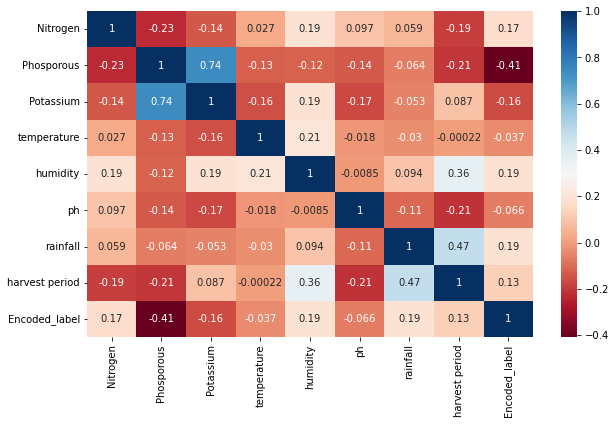

In [14]:
#checking the corelation
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True,cmap='RdBu')

In [15]:
crop_summary = pd.pivot_table(crop,index=['label'],aggfunc='mean')
crop_summary.head()

Nitrogen  Phosporous   Potassium  harvest period   humidity  \
label                                                                       
Cauliflower  30.551020   52.714286   19.551020             2.5  76.844596   
Onion        19.973684   68.315789   20.236842             3.5  51.936148   
Raddish      20.450704   48.422535   20.183099             2.0  85.729903   
Tomato       21.440000   48.010000   20.230000             6.0  53.160418   
apple        20.800000  134.220000  199.890000             6.0  92.333383   

                   ph    rainfall  temperature  
label                                           
Cauliflower  6.904829   56.174499    29.180523  
Onion        5.914207  154.390413    26.732481  
Raddish      6.733784   48.811732    28.485679  
Tomato       6.831174   51.198487    28.194920  
apple        5.929663  112.654779    22.630942

In [16]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['Nitrogen'],
    name='Nitrogen',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['Phosporous'],
    name='Phosphorous',
    marker_color='lightsalmon'
))
fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['Potassium'],
    name='Potash',
    marker_color='crimson'
))

fig.update_layout(title="N, P, K values comparision between crops",
                  plot_bgcolor='white',
                  barmode='group',
                  xaxis_tickangle=-45)

fig.show()

In [17]:
fig = px.bar(crop_summary, x=crop_summary.index, y=["rainfall", "temperature", "humidity"])
fig.update_layout(title_text="Comparision between rainfall, temerature and humidity",
                  plot_bgcolor='white',
                 height=500)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

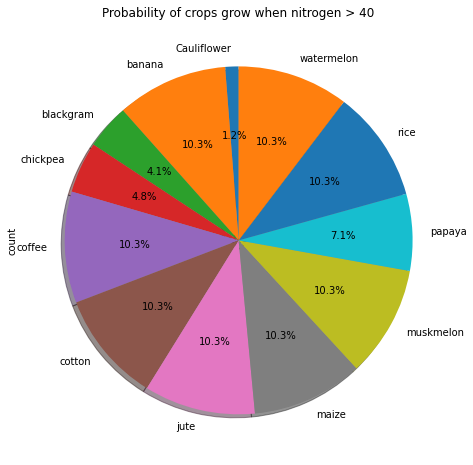

In [18]:
#which crops can grow at higher temperature .i.e., temperature > 30
x = pd.DataFrame(pd.crosstab(data.label[data.Nitrogen > 40],'count',normalize=True)*100)
x.plot.pie(y = 'count',autopct='%1.1f%%',figsize=(8,8),legend=None,shadow=True, startangle=90)
plt.title('Probability of crops grow when nitrogen > 40')
plt.show()

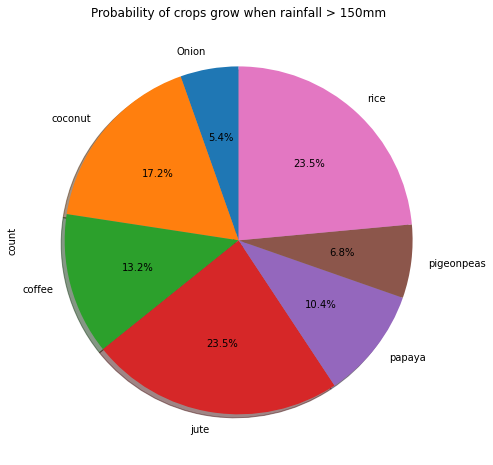

In [19]:
#which crops can grow at higher rainfall .i.e., rainfall > 150mm
x1 = pd.DataFrame(pd.crosstab(data.label[data.rainfall > 150],'count',normalize=True)*100)
x1.plot.pie(y = 'count',autopct='%1.1f%%',figsize=(8,8),legend=None,shadow=True, startangle=90)
plt.title('Probability of crops grow when rainfall > 150mm')
plt.show()

### Spliting the dataset ###

In [20]:
#Splitting the data into input and output
x = data.iloc[:,:-2]
y = data.Encoded_label
print('Input variables \n',x.head())
print('\nOutput Variable\n',y.head())

Input variables 
    Nitrogen  Phosporous  Potassium  temperature   humidity        ph  \
0        90          42         43    20.879744  82.002744  6.502985   
1        85          58         41    21.770462  80.319644  7.038096   
2        60          55         44    23.004459  82.320763  7.840207   
3        74          35         40    26.491096  80.158363  6.980401   
4        78          42         42    20.130175  81.604873  7.628473   

     rainfall label Soil Type sowing  month   Type  
0  202.935536  rice     Sandy           Jan  Grain  
1  226.655537  rice     Loamy           Mar  Grain  
2  263.964248  rice     Black           Oct  Grain  
3  242.864034  rice       Red           Apr  Grain  
4  262.717340  rice    Clayey           Nov  Grain  

Output Variable
 0    22
1    22
2    22
3    22
4    22
Name: Encoded_label, dtype: int32


In [21]:
#Splitting the data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=2)
print('Shape of Splitting :')
print('x_train = {}, x_test = {}, y_train = {}, y_test = {}'.format(x_train.shape,x_test.shape,y_train.shape,y_test.shape))

Shape of Splitting :
x_train = (1760, 11), x_test = (440, 11), y_train = (1760,), y_test = (440,)


In [22]:
x = data.iloc[:, [0,6]].values 
x

array([[ 90.       , 202.9355362],
       [ 85.       , 226.6555374],
       [ 60.       , 263.9642476],
       ...,
       [118.       , 173.3228386],
       [117.       , 127.1752928],
       [104.       , 140.9370415]])

### Scaling the Dataset ###

In [23]:
scaler = MinMaxScaler()
scaler.fit(data[['rainfall']])
data['rainfall'] = scaler.transform(data[['rainfall']])
data

scaler.fit(data[['Nitrogen']])
data['Nitrogen'] = scaler.transform(data[['Nitrogen']])
data

Nitrogen  Phosporous  Potassium  temperature   humidity        ph  \
0     0.642857          42         43    20.879744  82.002744  6.502985   
1     0.607143          58         41    21.770462  80.319644  7.038096   
2     0.428571          55         44    23.004459  82.320763  7.840207   
3     0.528571          35         40    26.491096  80.158363  6.980401   
4     0.557143          42         42    20.130175  81.604873  7.628473   
...        ...         ...        ...          ...        ...       ...   
2195  0.764286          34         32    26.774637  66.413269  6.780064   
2196  0.707143          15         27    27.417112  56.636362  6.086922   
2197  0.842857          33         30    24.131797  67.225123  6.362608   
2198  0.835714          32         34    26.272418  52.127394  6.758793   
2199  0.742857          18         30    23.603016  60.396475  6.779833   

      rainfall   label Soil Type sowing  month       Type  harvest period  \
0     0.656458    rice     Sandy           Jan      Grain             8.0   
1     0.741675    rice     Loamy           Mar      Grain             8.0   
2     0.875710    rice     Black           Oct      Grain             8.0   
3     0.799905    rice       Red           Apr      Grain             8.0   
4     0.871231    rice    Clayey           Nov      Grain             8.0   
...        ...     ...       ...           ...        ...             ...   
2195  0.566064  coffee     Sandy           Oct  cash crop             4.0   
2196  0.386972  coffee     Black           Apr  cash crop             4.0   
2197  0.550071  coffee     Loamy           Nov  cash crop             4.0   
2198  0.384280  coffee     Sandy           Feb  cash crop             4.0   
2199  0.433721  coffee     Loamy           Dec  cash crop             4.0   

      Encoded_label  
0                22  
1                22  
2                22  
3                22  
4                22  
...             ...  
2195              9  
2196              9  
2197              9  
2198              9  
2199              9  

[2200 rows x 13 columns]

## Outlier handling ##

In [24]:
data.describe()[['ph']]

ph
count  2200.000000
mean      6.469480
std       0.773938
min       3.504752
25%       5.971693
50%       6.425045
75%       6.923643
max       9.935091

### Outlier Detection ###

In [25]:
#create a function to find outliers using IQR

def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

In [26]:
outliers = find_outliers_IQR(data["ph"])

print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min outlier value: "+ str(outliers.min()))

outliers

number of outliers: 57
max outlier value: 9.93509073
min outlier value: 3.504752314


209     8.753795
210     8.718193
213     8.490127
222     8.519976
232     8.829273
233     8.621663
240     8.868741
241     8.766129
242     8.736338
246     8.380185
287     8.423874
288     8.719961
295     8.861480
500     3.692864
501     4.371746
502     8.399136
503     8.840656
507     9.679241
514     8.985348
517     4.524172
518     9.926212
521     3.711059
523     9.254089
526     3.808429
528     4.523636
529     3.510404
535     3.828031
536     8.869533
537     3.793575
538     4.193189
540     9.392695
541     4.516154
545     8.620108
546     9.459493
550     9.160692
553     9.072011
557     3.504752
560     8.660780
561     3.558823
563     9.416003
568     8.923096
572     8.709292
575     4.397699
577     8.532079
582     3.525366
583     8.869797
584     9.406888
586     8.354958
587     8.634930
590     9.112772
594     9.935091
595     8.914075
596     8.639586
597     8.621514
599     3.532009
1128    4.507524
1195    4.525722
Name: ph, dtype: float64

C:\Users\Hi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='ph'>

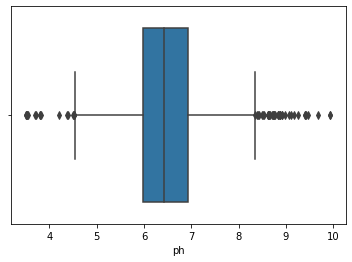

In [27]:
# Box Plot
sns.boxplot(data['ph'])

### Caping the outlier ###

In [28]:
percentile25 = data['ph'].quantile(0.25)
percentile75 = data['ph'].quantile(0.75)

In [29]:
iqr=percentile25-percentile75

In [30]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [31]:
data[data['ph'] > upper_limit]
data[data['ph']< lower_limit]

Nitrogen  Phosporous  Potassium  temperature   humidity        ph  \
0     0.642857          42         43    20.879744  82.002744  6.502985   
1     0.607143          58         41    21.770462  80.319644  7.038096   
3     0.528571          35         40    26.491096  80.158363  6.980401   
5     0.492857          37         42    23.058049  83.370118  7.073454   
6     0.492857          55         38    22.708838  82.639414  5.700806   
...        ...         ...        ...          ...        ...       ...   
2195  0.764286          34         32    26.774637  66.413269  6.780064   
2196  0.707143          15         27    27.417112  56.636362  6.086922   
2197  0.842857          33         30    24.131797  67.225123  6.362608   
2198  0.835714          32         34    26.272418  52.127394  6.758793   
2199  0.742857          18         30    23.603016  60.396475  6.779833   

      rainfall   label Soil Type sowing  month       Type  harvest period  \
0     0.656458    rice     Sandy           Jan      Grain             8.0   
1     0.741675    rice     Loamy           Mar      Grain             8.0   
3     0.799905    rice       Red           Apr      Grain             8.0   
5     0.829332    rice     Sandy           Feb      Grain             8.0   
6     0.902154    rice       Red           Dec      Grain             8.0   
...        ...     ...       ...           ...        ...             ...   
2195  0.566064  coffee     Sandy           Oct  cash crop             4.0   
2196  0.386972  coffee     Black           Apr  cash crop             4.0   
2197  0.550071  coffee     Loamy           Nov  cash crop             4.0   
2198  0.384280  coffee     Sandy           Feb  cash crop             4.0   
2199  0.433721  coffee     Loamy           Dec  cash crop             4.0   

      Encoded_label  
0                22  
1                22  
3                22  
5                22  
6                22  
...             ...  
2195              9  
2196              9  
2197              9  
2198              9  
2199              9  

[1967 rows x 13 columns]

C:\Users\Hi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\Hi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='ph', ylabel='Density'>

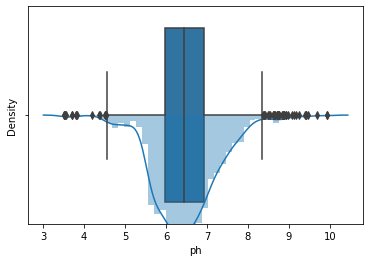

In [32]:
sns.distplot(data['ph'])
sns.boxplot(data['ph'])

In [33]:
upper_limit = data['ph'].mean() + 3*data['ph'].std()

print(upper_limit)

lower_limit = data['ph'].mean() - 3*data['ph'].std()

print(lower_limit)

8.791293129345984
4.147667001166751


In [34]:
data['ph'] = np.where(data['ph'] > upper_limit,

   upper_limit,

   np.where(

       data['ph'] < lower_limit,

       lower_limit,

       data['ph']  

   )

)

In [35]:
data.describe()[['ph']]

ph
count  2200.000000
mean      6.468144
std       0.753556
min       4.147667
25%       5.971693
50%       6.425045
75%       6.923643
max       8.791293

## Hidden Patterns ##

In [36]:
## Lets find out some Interesting Facts

print("Some Interesting Patterns")
print("---------------------------------")
print("Crops which requires very High Ratio of Nitrogen Content in Soil:", data[data['Nitrogen'] > 0.9]['label'].unique())
print("Crops which requires very High Ratio of Phosphorous Content in Soil:", data[data['Phosporous'] > 100]['label'].unique())
print("Crops which requires very High Ratio of Potassium Content in Soil:", data[data['Potassium'] > 200]['label'].unique())
print("Crops which requires very High Rainfall:", data[data['rainfall'] > 0.9]['label'].unique())
print("Crops which requires very Low Temperature :", data[data['temperature'] < 10]['label'].unique())
print("Crops which requires very High Temperature :", data[data['temperature'] > 40]['label'].unique())
print("Crops which requires very Low Humidity:", data[data['humidity'] < 20]['label'].unique())
print("Crops which requires very Low pH:", data[data['ph'] < 5.0]['label'].unique())
print("Crops which requires very High pH:", data[data['ph'] > 8.0]['label'].unique())

Some Interesting Patterns
---------------------------------
Crops which requires very High Ratio of Nitrogen Content in Soil: ['cotton']
Crops which requires very High Ratio of Phosphorous Content in Soil: ['grapes' 'apple']
Crops which requires very High Ratio of Potassium Content in Soil: ['grapes' 'apple']
Crops which requires very High Rainfall: ['rice']
Crops which requires very Low Temperature : ['grapes']
Crops which requires very High Temperature : ['grapes' 'papaya']
Crops which requires very Low Humidity: ['chickpea' 'kidneybeans']
Crops which requires very Low pH: ['pigeonpeas' 'Onion' 'Tomato' 'mango']
Crops which requires very High pH: ['chickpea' 'Tomato']


In [37]:
print("Summer Crops")
print(data[(data['temperature'] > 30) & (data['humidity'] > 50)]['label'].unique())
print("-----------------------------------")
print("Winter Crops")
print(data[(data['temperature'] < 20) & (data['humidity'] > 30)]['label'].unique())
print("-----------------------------------")
print("Rainy Crops")
print(data[(data['rainfall'] > 0.6) & (data['humidity'] > 30)]['label'].unique())

Summer Crops
['pigeonpeas' 'Onion' 'Tomato' 'Cauliflower' 'blackgram' 'mango' 'grapes'
 'orange' 'papaya']
-----------------------------------
Winter Crops
['maize' 'pigeonpeas' 'Onion' 'lentil' 'pomegranate' 'grapes' 'orange']
-----------------------------------
Rainy Crops
['rice' 'pigeonpeas' 'Onion' 'papaya' 'coconut' 'jute' 'coffee']


# Clustering Similar Crops #
  
    
 
## K means Clustering ##


In [38]:
def optimise_k_means(data, max_k):
    means = []
    inertias = []
    
    for k in range(1,max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        means.append(k)
        inertias.append(kmeans.inertia_)
        
    fig = plt.subplots(figsize=(10, 5))
    plt.plot(means, inertias, 'o-')
    plt.xlabel("Number of Clusters")
    plt.ylabel("Crop")
    plt.grid(True)
    plt.show()

In [39]:
data.dropna(inplace=True)

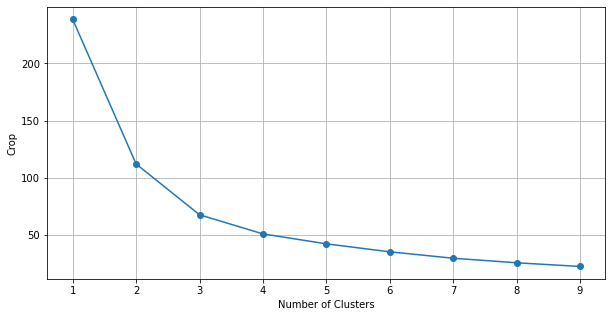

In [40]:
optimise_k_means(data[['Nitrogen','rainfall']],10)

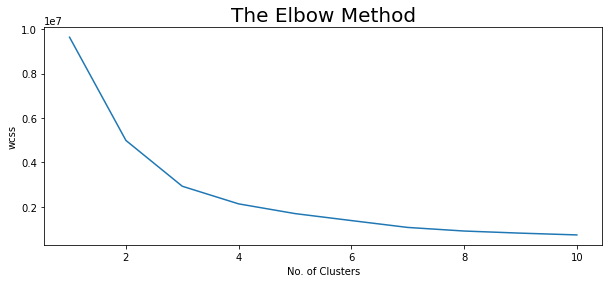

In [41]:
from sklearn.cluster import KMeans
plt.rcParams['figure.figsize'] = (10, 4)

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)

# lets plot the results
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

In [42]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
score = silhouette_score(x, km.labels_, metric='euclidean')
#
# Print the score
#
print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.424


In [43]:
km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)
crop1=crop.copy()
# lets find out the Results
a = crop1['label']
y_means = pd.DataFrame(y_means)
z = pd.concat([y_means, crop1], axis = 1)
z = z.rename(columns = {0: 'cluster'})
print(z)
# lets check the Clusters of each Crops
print("K Means Clustering Analysis \n")
print("Crops in Zero Cluster:", z[z['cluster'] == 0]['label'].unique())
print("---------------------------------------------------------------")
print("Crops in First Cluster:", z[z['cluster'] == 1]['label'].unique())
print("---------------------------------------------------------------")
print("Crops in Second Cluster:", z[z['cluster'] == 2]['label'].unique())
print("---------------------------------------------------------------")


      cluster  Nitrogen  Phosporous  Potassium  temperature   humidity  \
0           0        90          42         43    20.879744  82.002744   
1           0        85          58         41    21.770462  80.319644   
2           0        60          55         44    23.004459  82.320763   
3           0        74          35         40    26.491096  80.158363   
4           0        78          42         42    20.130175  81.604873   
...       ...       ...         ...        ...          ...        ...   
2195        0       107          34         32    26.774637  66.413269   
2196        1        99          15         27    27.417112  56.636362   
2197        0       118          33         30    24.131797  67.225123   
2198        1       117          32         34    26.272418  52.127394   
2199        0       104          18         30    23.603016  60.396475   

            ph    rainfall   label Soil Type sowing  month       Type  \
0     6.502985  202.935536    rice    

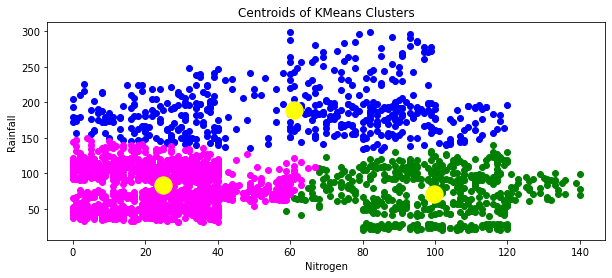

In [44]:
K=3
Centroids = (z.sample(n=K))
color=['blue','green','magenta']
for k in range(K):
    data=z[z["cluster"]==k]
    plt.scatter(data["Nitrogen"],data["rainfall"],c=color[k])

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=300,c='yellow',label='centroid')
plt.title("Centroids of KMeans Clusters")
plt.xlabel('Nitrogen')
plt.ylabel('Rainfall')
plt.show()

### Interpretation ###
* For the less nitrogen level and rainfall about 50 to 150 mm
  Crops in Second Cluster:'maize' 'chickpea' 'kidneybeans''pigeonpeas' 
  'Onion' 'Tomato' 'Raddish''Cauliflower' 'blackgram' 'lentil'
  'pomegranate' 'mango' 'grapes' 'apple''orange' 
  'papaya' 'coconut' are recommended

* For the high nitrogen level i.e 60 to 140 and rainfall about 50 to 150 mm 
  Crops in First Cluster: 'maize' 'banana' 'watermelon' 'muskmelon' 'papaya' 'cotton'
  'coffee' are recommended

* For high rainfall ie above 150mm to 300 mm and nitrogen level about 0 to 120 
  Crops in Zero Cluster: 'rice' 'kidneybeans''pigeonpeas' 'Onion' 'papaya' 'coconut' 'jute' 
  'coffee' are recommended.
    

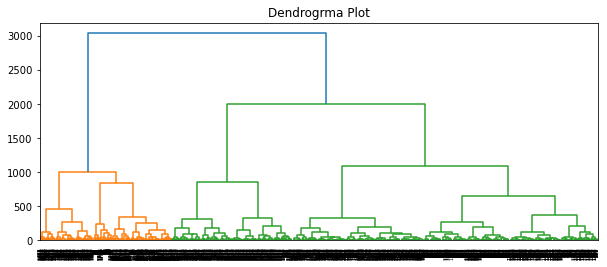

In [45]:
import scipy.cluster.hierarchy as shc  
dendro = shc.dendrogram(shc.linkage(x, method="ward"))  
plt.title("Dendrogrma Plot")  
plt.show()

## Normalization ##

In [46]:
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

In [47]:
#importing necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, plot_confusion_matrix
from sklearn.model_selection import GridSearchCV

In [48]:
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(x) 
  
# Normalizing the Data 
normalized_df = normalize(scaled_df) 
  
# Converting the numpy array into a pandas DataFrame 
normalized_df = pd.DataFrame(normalized_df) 
  
# Reducing the dimensions of the data 
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(normalized_df) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
  
X_principal.head(2)

P1        P2
0  0.814783  0.827984
1  0.703628  0.911010

In [49]:
#training the hierarchical model on dataset  
from sklearn.cluster import AgglomerativeClustering  
hc= AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
y_her= hc.fit_predict(x)  

# lets find out the Results
b = crop['label']
y_herr = pd.DataFrame(y_her)
w = pd.concat([y_herr, b], axis = 1)
w= w.rename(columns = {0: 'cluster'})

# lets check the Clusters of each Crops
print("Hierachical Clustering Analysis \n")
print("Crops in Zero Cluster:", w[w['cluster'] == 0]['label'].unique())
print("---------------------------------------------------------------")
print("Crops in First Cluster:", w[w['cluster'] == 1]['label'].unique())
print("---------------------------------------------------------------")
print("Crops in second Cluster:", w[w['cluster'] == 2]['label'].unique())

#crop.insert(2, "H_Cluster", y_her, True)
#crop.drop("Kmeans_Cluster",axis=1,inplace=True)
crop

Hierachical Clustering Analysis 

Crops in Zero Cluster: ['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'Onion' 'Tomato' 'Raddish'
 'Cauliflower' 'blackgram' 'lentil' 'pomegranate' 'mango' 'grapes' 'apple'
 'orange' 'papaya' 'coconut']
---------------------------------------------------------------
Crops in First Cluster: ['rice' 'kidneybeans' 'pigeonpeas' 'Onion' 'papaya' 'coconut' 'jute'
 'coffee']
---------------------------------------------------------------
Crops in second Cluster: ['maize' 'banana' 'watermelon' 'muskmelon' 'papaya' 'cotton' 'coffee']


Nitrogen  Phosporous  Potassium  temperature   humidity        ph  \
0           90          42         43    20.879744  82.002744  6.502985   
1           85          58         41    21.770462  80.319644  7.038096   
2           60          55         44    23.004459  82.320763  7.840207   
3           74          35         40    26.491096  80.158363  6.980401   
4           78          42         42    20.130175  81.604873  7.628473   
...        ...         ...        ...          ...        ...       ...   
2195       107          34         32    26.774637  66.413269  6.780064   
2196        99          15         27    27.417112  56.636362  6.086922   
2197       118          33         30    24.131797  67.225123  6.362608   
2198       117          32         34    26.272418  52.127394  6.758793   
2199       104          18         30    23.603016  60.396475  6.779833   

        rainfall   label Soil Type sowing  month       Type  harvest period  
0     202.935536    rice     Sandy           Jan      Grain             8.0  
1     226.655537    rice     Loamy           Mar      Grain             8.0  
2     263.964248    rice     Black           Oct      Grain             8.0  
3     242.864034    rice       Red           Apr      Grain             8.0  
4     262.717340    rice    Clayey           Nov      Grain             8.0  
...          ...     ...       ...           ...        ...             ...  
2195  177.774507  coffee     Sandy           Oct  cash crop             4.0  
2196  127.924610  coffee     Black           Apr  cash crop             4.0  
2197  173.322839  coffee     Loamy           Nov  cash crop             4.0  
2198  127.175293  coffee     Sandy           Feb  cash crop             4.0  
2199  140.937041  coffee     Loamy           Dec  cash crop             4.0  

[2200 rows x 12 columns]

In [50]:
# Hard Clustering

print("Results for Hard Clustering\n")
counts = z[z['cluster'] == 0]['label'].value_counts()
d = z.loc[z['label'].isin(counts.index[counts >= 50])]
d = d['label'].value_counts()
print("Crops in Cluster 1:", list(d.index))
print("--------------------------------------------------")
counts = z[z['cluster'] == 1]['label'].value_counts()
d = z.loc[z['label'].isin(counts.index[counts >= 50])]
d = d['label'].value_counts()
print("Crops in Cluster 2:", list(d.index))
print("--------------------------------------------------")
counts = z[z['cluster'] == 2]['label'].value_counts()
d = z.loc[z['label'].isin(counts.index[counts >= 50])]
d = d['label'].value_counts()
print("Crops in Cluster 3:", list(d.index))
print("--------------------------------------------------")


Results for Hard Clustering

Crops in Cluster 1: ['rice', 'papaya', 'coconut', 'jute', 'coffee']
--------------------------------------------------
Crops in Cluster 2: ['maize', 'banana', 'watermelon', 'muskmelon', 'cotton']
--------------------------------------------------
Crops in Cluster 3: ['chickpea', 'kidneybeans', 'Tomato', 'lentil', 'pomegranate', 'mango', 'grapes', 'apple', 'orange', 'blackgram', 'Raddish']
--------------------------------------------------


## Data Visualizations ##

C:\Users\Hi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\Hi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\Hi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\Hi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWar

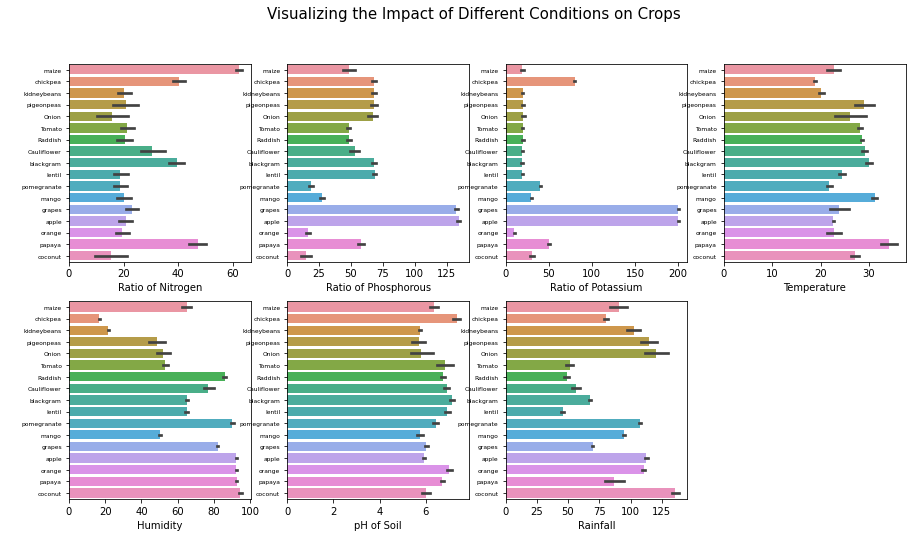

In [51]:
plt.rcParams['figure.figsize'] = (15, 8)

plt.subplot(2, 4, 1)
sns.barplot(data['Nitrogen'], data['label'])
plt.ylabel(' ')
plt.xlabel('Ratio of Nitrogen', fontsize = 10)
plt.yticks(fontsize = 6)

plt.subplot(2, 4, 2)
sns.barplot(data['Phosporous'], data['label'])
plt.ylabel(' ')
plt.xlabel('Ratio of Phosphorous', fontsize = 10)
plt.yticks(fontsize = 6)

plt.subplot(2, 4, 3)
sns.barplot(data['Potassium'], data['label'])
plt.ylabel(' ')
plt.xlabel('Ratio of Potassium', fontsize = 10)
plt.yticks(fontsize = 6)

plt.subplot(2, 4, 4)
sns.barplot(data['temperature'], data['label'])
plt.ylabel(' ')
plt.xlabel('Temperature', fontsize = 10)
plt.yticks(fontsize = 6)

plt.subplot(2, 4, 5)
sns.barplot(data['humidity'], data['label'])
plt.ylabel(' ')
plt.xlabel('Humidity', fontsize = 10)
plt.yticks(fontsize = 6)

plt.subplot(2, 4, 6)
sns.barplot(data['ph'], data['label'])
plt.ylabel(' ')
plt.xlabel('pH of Soil', fontsize = 10)
plt.yticks(fontsize = 6)

plt.subplot(2, 4, 7)
sns.barplot(data['rainfall'], data['label'])
plt.ylabel(' ')
plt.xlabel('Rainfall', fontsize = 10)
plt.yticks(fontsize = 6)

plt.suptitle('Visualizing the Impact of Different Conditions on Crops', fontsize = 15)
plt.show()

## Agglomerative Clustering ##

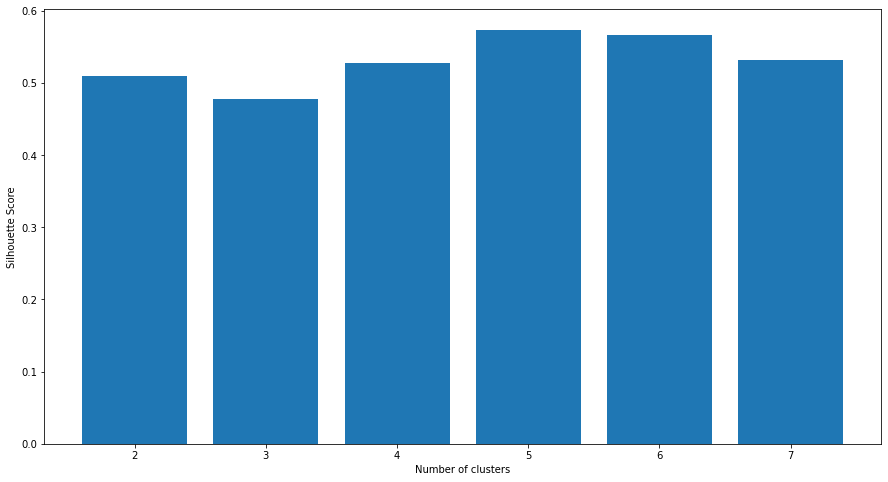

In [52]:
from sklearn.metrics import silhouette_score
silhouette_scores = [] 

for n_cluster in range(2, 8):
    silhouette_scores.append( 
        silhouette_score(X_principal, AgglomerativeClustering(n_clusters = n_cluster).fit_predict(X_principal))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

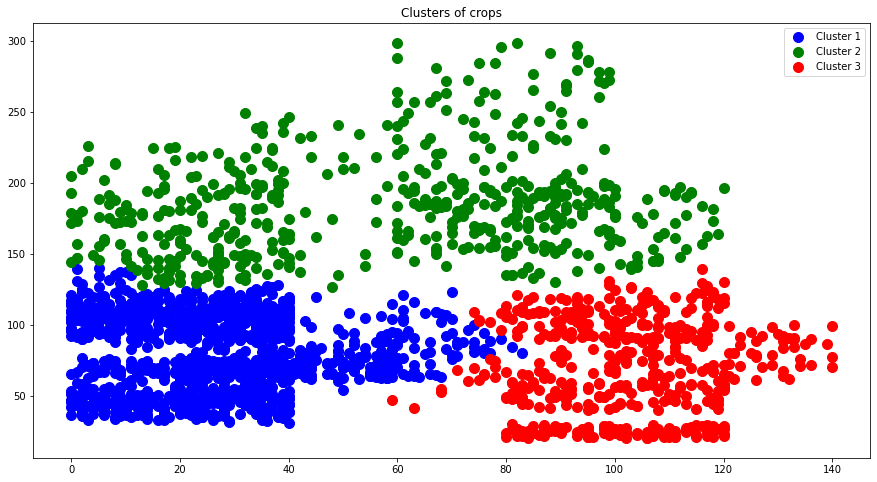

In [53]:
#visulaizing the clusters  
plt.scatter(x[y_her == 0, 0], x[y_her == 0, 1], s = 100, c = 'blue', label = 'Cluster 1')  
plt.scatter(x[y_her == 1, 0], x[y_her == 1, 1], s = 100, c = 'green', label = 'Cluster 2')
plt.scatter(x[y_her == 2, 0], x[y_her == 2, 1], s = 100, c = 'red', label = 'Cluster 3')
plt.title('Clusters of crops')  
plt.legend()  
plt.show()

## Decision Tree Classifier ##

In [54]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, r2_score, classification_report

In [55]:
#Prediction
features = crop[['Nitrogen', 'Phosporous','Potassium','temperature', 'humidity', 'ph', 'rainfall']]
target = crop['label']

In [56]:
# feature scaling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(features,target,test_size = 0.2,random_state =2)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

# we must apply the scaling to the test set as well that we are computing for the training set
X_test_scaled = scaler.transform(X_test)

In [57]:
#Classifier
tree = DecisionTreeClassifier(max_depth=20,random_state=0).fit(X_train_scaled, y_train)
tree_pred= tree.score(X_test_scaled, y_test)

tree_train_accuracy =tree.score(X_train_scaled,y_train)
tree_accuracy = tree.score(X_test_scaled,y_test)
pred_prob_tree = tree.predict_proba(X_test_scaled)

print("Training score: {:.3f}".format(tree.score(X_train_scaled, y_train)))
print("Test score: {:.3f}".format(tree.score(X_test_scaled, y_test)))

Training score: 0.998
Test score: 0.920


In [58]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(x_train, y_train)

DecisionTreeClassifier()

In [59]:
 y_pred = classifier.predict(x_test)
print(y_pred)

[16  3 22  3 10 21 14  1 11 16 19  8  0  9  9  4  3  4  9  7 22 23 23  5
 18 18 22  1  5 17 15 23  5 11  4  8 23 12 18  3  7 22 16 16  4 19  6 18
 16  4  3  4 16 18 21 17  1 12  9  7  9  9 19 20 19  0 17  3  3 17  4 10
  8  4 20  6 11 23 22  2 15 12 15 10 11 18 22  8 19  8  7 20  3  2 11  5
  5  3 17 17  8 22  3  9 11 18  7 10 16  9  2  3 21 21  9  6 11 20 22 13
 12 10  8 15  8 11 20 17  1 17 21 11 23 11  1  4 10  8  3  6 15 17  3 12
 21  7 22  1  8 14  4 19 14 19  5 21 22  3 15  8 20 23  9 11  9 14 14  8
  4  3  7 14 17  9 23  1 16 10 16 21 14 23 19  4  5  5  9  4  8 22 21 21
 20 20  3 22 17 23 13  1  7  2 22 12 18 15 19  4 17  2 16 16 21 23 12  7
  7  2 17  8  2 21 17 14  5 19  4 17  7  2 19  3  2 17 23 21 21 11 15 14
  3 21  7  8  3  9  3 22 19 22  7 10 17 15  6 23  8  5 20 19  0 22 19 10
 13 18 22  5  9  3 19  0 18 21  1 18  6 21 11 23 16  1 13  3 18 15 16 20
 21  7 12  1 10  7  3 22  6  9 10  8 11 21 21 12  3 23 15  7  8 21 15 13
  9 21  2  5 10  9 12  7 13 10 22 13 14  7 15 19 18

In [60]:
clf = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
clf.score(X_test,y_test)

0.03409090909090909

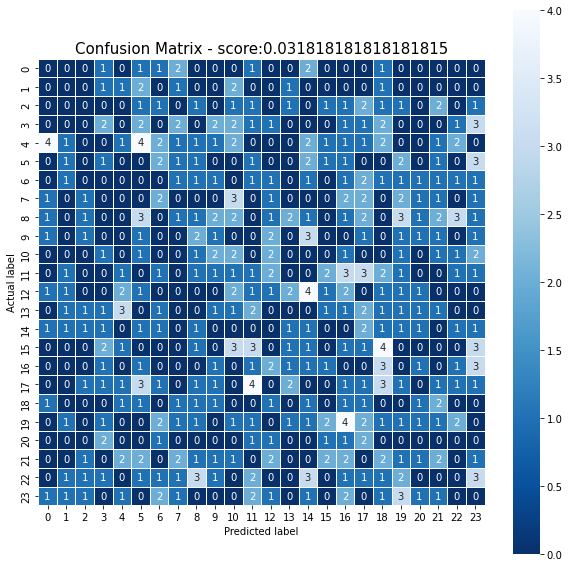

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.00      0.00      0.00         9
           2       0.00      0.00      0.00        15
           3       0.12      0.10      0.11        20
           4       0.07      0.04      0.05        27
           5       0.00      0.00      0.00        17
           6       0.00      0.00      0.00        16
           7       0.00      0.00      0.00        17
           8       0.06      0.04      0.04        28
           9       0.06      0.06      0.06        16
          10       0.09      0.13      0.11        15
          11       0.04      0.05      0.04        22
          12       0.06      0.05      0.05        21
          13       0.00      0.00      0.00        19
          14       0.04      0.06      0.05        16
          15       0.00      0.00      0.00        21
          16       0.00      0.00      0.00        17
          17       0.04    

In [61]:
tree_model=DecisionTreeClassifier(random_state=0)
tree_model.fit(X_train_scaled,y_train)
y_pred=tree_model.predict(X_test_scaled)
from sklearn import metrics

tree_cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,10))
sns.heatmap(tree_cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(metrics.accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(y_test,y_pred))

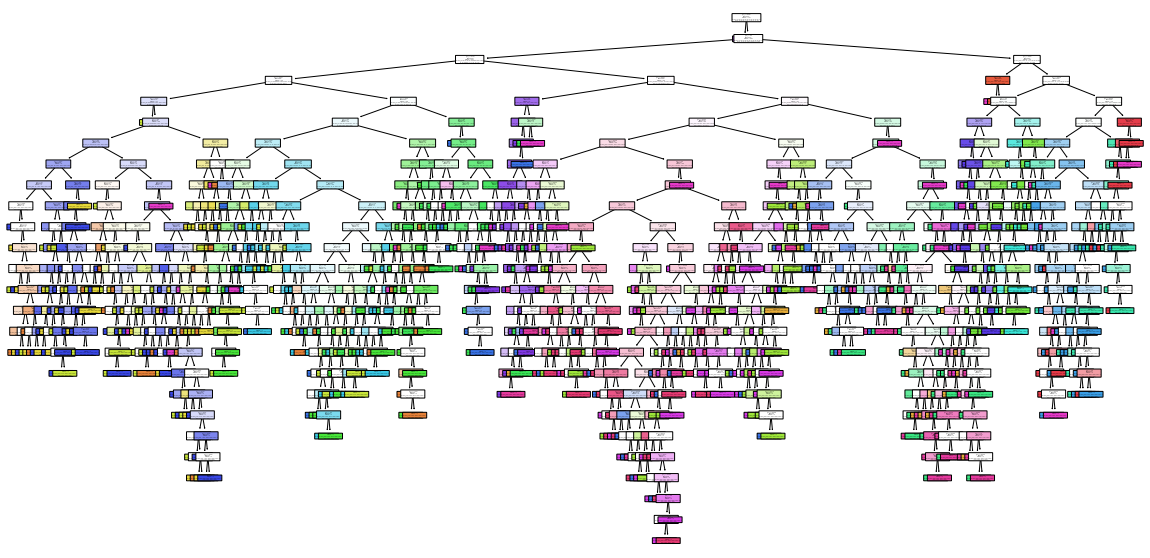

In [62]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
tree.plot_tree(classifier, filled=True, rounded=True)
plt.show()

## Feature Importance ##

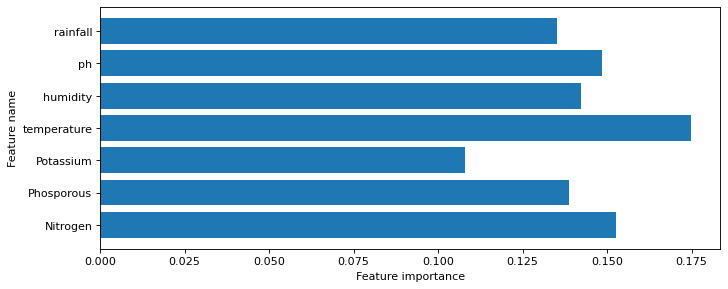

In [63]:
plt.figure(figsize=(10,4), dpi=80)
c_features = len(X_train.columns)
plt.barh(range(c_features), clf.feature_importances_)
plt.xlabel("Feature importance")
plt.ylabel("Feature name")
plt.yticks(np.arange(c_features), X_train.columns)
plt.show()

## Naive bayes Classifier ##

In [64]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

In [65]:
nb_pred=nb.predict(X_test)

In [66]:
from sklearn.metrics import accuracy_score
print("Train accuracy:",nb.score(X_train,y_train)*100)
print("Test accuracy:",nb.score(X_test,y_test)*100)
print("Accuracy Score of Naive Bayes : ", accuracy_score(y_test, nb_pred)*100)

Train accuracy: 7.670454545454546
Test accuracy: 4.318181818181818
Accuracy Score of Naive Bayes :  4.318181818181818


## KNN Classifier ##

In [67]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
knn_pred=knn.score(X_test_scaled, y_test)

knn_train_accuracy =knn.score(X_train_scaled,y_train)
knn_accuracy = knn.score(X_test_scaled,y_test)
pred_prob_knn = knn.predict_proba(X_test_scaled)

print("Training score: {:.3f}".format(knn.score(X_train_scaled, y_train)))
print("Test score: {:.3f}".format(knn.score(X_test_scaled, y_test)))

Training score: 0.265
Test score: 0.027


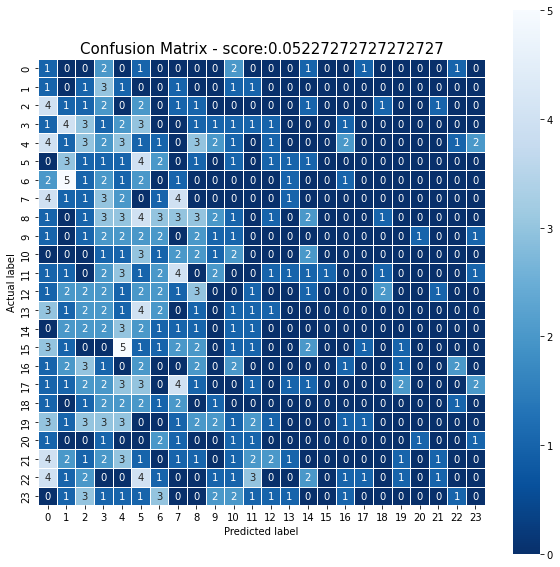

              precision    recall  f1-score   support

           0       0.02      0.11      0.04         9
           1       0.00      0.00      0.00         9
           2       0.03      0.07      0.04        15
           3       0.02      0.05      0.03        20
           4       0.07      0.11      0.09        27
           5       0.09      0.24      0.13        17
           6       0.00      0.00      0.00        16
           7       0.14      0.24      0.17        17
           8       0.12      0.11      0.11        28
           9       0.07      0.06      0.06        16
          10       0.10      0.13      0.11        15
          11       0.00      0.00      0.00        22
          12       0.00      0.00      0.00        21
          13       0.00      0.00      0.00        19
          14       0.00      0.00      0.00        16
          15       0.00      0.00      0.00        21
          16       0.12      0.06      0.08        17
          17       0.00    

In [68]:
knn_model=KNeighborsClassifier(n_neighbors = 4)
knn_model.fit(X_train_scaled,y_train)
y_pred=knn_model.predict(X_test_scaled)
from sklearn import metrics

knn_cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,10))
sns.heatmap(knn_cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(metrics.accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(y_test,y_pred))

## xtreme gradient classifier ##

In [69]:

import xgboost as xgb
XB = xgb.XGBClassifier()
XB.fit(X_train_scaled,y_train)
XB_pred = XB.score(X_test_scaled,y_test)
XB_train_accuracy = XB.score(X_train_scaled,y_train)
pred_prob_XB = XB.predict_proba(X_test_scaled)

print("Training accuracy = ",XB.score(X_train_scaled,y_train))
#Print Test Accuracy
XB_accuracy = XB.score(X_test_scaled,y_test)
print("Testing accuracy = ",XB.score(X_test_scaled,y_test))

C:\Users\Hi\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

C:\Users\Hi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[10:02:38] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training accuracy =  1.0
Testing accuracy =  0.031818181818181815


[10:02:41] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Hi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



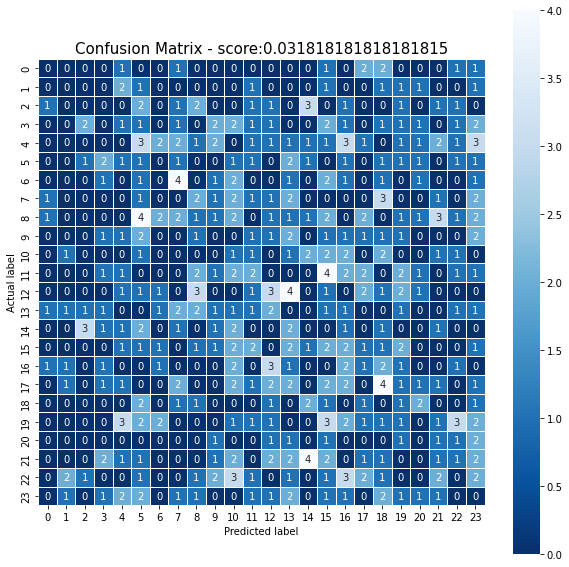

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.00      0.00      0.00         9
           2       0.00      0.00      0.00        15
           3       0.00      0.00      0.00        20
           4       0.00      0.00      0.00        27
           5       0.03      0.06      0.04        17
           6       0.00      0.00      0.00        16
           7       0.00      0.00      0.00        17
           8       0.06      0.04      0.04        28
           9       0.00      0.00      0.00        16
          10       0.04      0.07      0.05        15
          11       0.11      0.09      0.10        22
          12       0.14      0.14      0.14        21
          13       0.00      0.00      0.00        19
          14       0.00      0.00      0.00        16
          15       0.06      0.10      0.08        21
          16       0.08      0.12      0.09        17
          17       0.00    

In [70]:
XB_model=xgb.XGBClassifier()
XB_model.fit(X_train_scaled,y_train)
y_pred=XB_model.predict(X_test_scaled)
from sklearn import metrics

XB_cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,10))
sns.heatmap(XB_cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(metrics.accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(y_test,y_pred))

In [71]:
y_train_pred = XB_model.predict(X_train_scaled)
print("Accuracy Score of Xtreme Gradient Boosting:",accuracy_score(y_train,y_train_pred))

Accuracy Score of Xtreme Gradient Boosting: 1.0


## Accuracy ##


In [72]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from xgboost.sklearn import XGBClassifier
from sklearn import metrics

target = ['label']
features = ['Nitrogen', 'Phosporous', 'Potassium', 'temperature', 'humidity', 'ph', 'rainfall']

X = data[features]
y = data[target]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=True)

models = []
models.append(('LogisticRegression', LogisticRegression(random_state=0)))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier(random_state=0)))
models.append(('XGBClassifier', XGBClassifier(random_state=0)))
models.append(('GradientBoostingClassifier', GradientBoostingClassifier(random_state=0)))
models.append(('KNeighborsClassifier', KNeighborsClassifier()))
models.append(('RandomForestClassifier', RandomForestClassifier(random_state=0)))
model_name = []
accuracy = []

for name, model in models: 
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    model_name.append(name)
    accuracy.append(metrics.accuracy_score(y_test,y_pred))
    print(name, metrics.accuracy_score(y_test,y_pred))

C:\Users\Hi\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Hi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier obje

LogisticRegression 0.8964646464646465
DecisionTreeClassifier 0.9292929292929293
[10:02:46] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier 0.9343434343434344


C:\Users\Hi\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



GradientBoostingClassifier 0.9141414141414141
KNeighborsClassifier 0.9040404040404041


C:\Users\Hi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Hi\AppData\Local\Temp\ipykernel_14124\2081234577.py:26: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestClassifier 0.9368686868686869


## Prediction ##

In [73]:
prediction= XB_model.predict(np.array([[90,42,43,20.879744,82.002744,6.502985,202.935536]]))
print("The Suggested Crop for Given Climatic Condition is :", prediction)

The Suggested Crop for Given Climatic Condition is : [9]


In [74]:
import pickle
pickle.dump(XB_model,open("xgb.pkl","wb"))